In [1]:
import random as rnd
import time
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
%matplotlib inline

### 1. Selection Sort:
- Greedy: solution to the given problem is a series of correct decision. In each step, it is relatively easy to determine the correct decision. 
- In selection sort, at each step, the smallest elements among the 'unsorted elements' is selected and moved to the left (to the end of the already sorted part)

In [11]:
def selection_sort(A):
    """
    Input: unsorted sequence A (list of numbers)
    Output: sorted A, via selection_sort
    """
    for j in range(1, len(A)):
        i = j
        for l in range(j+1,len(A)+1):
            if A[l-1] < A[i-1]:
                i = l
        if i != j:
            x = A[i-1]
            A[i-1] = A[j-1]
            A[j-1] = x
    return A

### 2. Insertion Sort:

In [12]:
def insertion_sort(A):
    """
    Input: unsorted sequence A (list of numbers)
    Output: sorted A, via insertion_sort
    """
    for j in range(1,len(A)):
        c = A[j]
        i = j-1
        while i > -1 and A[i] > c:
            A[i+1] = A[i]
            i = i-1
        A[i+1] = c
    return A

### 3. Merge Sort:
- Divide and Conquer: the given problem is divided into smaller subproblems of the same type (albeit easier to solve). Solutions of these sub-problems can be efficiently combined into a larger solution for the original problem.
- In merge sort: the sequence is easily divided at the middle into two shorter sub-sequences and this process keeps repeating until each of the many sub-sequences has only one element. From that onwards, the conquer step takes place (`merge` function below). The conquer step is way more complex and costly than the divide step.

In [13]:
def merge(A1,A2):
    """
    Input: two already sorted sequences A1 and A2
    Output: a sorted sequence A, made up of elements of A1 and A2
    """
    A = []
    i = 0; j = 0;
    while i < len(A1) and j < len(A2):
        if A1[i] > A2[j]:
            A.append(A2[j])
            j += 1
        else:
            A.append(A1[i])
            i += 1
    if i == len(A1):
        A += A2[j:]
    else:
        A += A1[i:]
    return A

def merge_sort(A):
    """
    Input: unsorted sequence A (list of numbers)
    Output: sorted A, via merge_sort
    """
    if len(A) <= 1:
        return A
    split = len(A) // 2
    A1 = merge_sort(A[:split])
    A2 = merge_sort(A[split:])
    A = merge(A1,A2)
    return A

### 4. Quick Sort 
- Divide and Conquer: see Merge Sort
- In quick sort: a pivot value is chosen to divide a sequence into two subsequences (<= and > pivot value). This is the divide step and keeps being executed until each of the many sub-sequences has only one element. Conquer is almost no work. The divide step is way more complex and costly than the conquer step.

In [14]:
def partition(A, ell, r):
    """
    Input:
    A: list, unsorted sequence of numbers
    ell: int, starting position 
    r: int, position of the pivot value
    Output:
    the new position of the pivot value
    """
    pivot = A[r]
    i = ell-1
    for j in range(ell,r):
        if A[j] <= pivot:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i+1], A[r] = A[r], A[i+1]   
    return i+1

def quick_sort(A):
    """
    Input: unsorted sequence A (list of numbers)
    Output: sorted A, via quick_sort
    """
    quick_sort_recursive(A,0,len(A)-1)
    return A

def quick_sort_recursive(A, ell, r):
    """
    Input:
    A: list, unsorted sequence of numbers
    ell: int, starting position 
    r: int, position of the pivot value
    """
    if ell < r:
        p = partition(A, ell, r)
        quick_sort_recursive(A, ell, p-1)
        quick_sort_recursive(A, p+1, r)

In [22]:
# Check the accuracies of our functions
rnd.seed(10)
a = rnd.sample(range(600),15)
a = list(a)
b,c,d = a.copy(), a.copy(), a.copy()
print('unsorted sequence:',a)
print('\ninsertion_sort:',insertion_sort(a))
print('\nselection_sort:',selection_sort(b))
print('\nmerge_sort:',merge_sort(c))
print('\nquick_sort:',quick_sort(d))

unsorted sequence: [585, 33, 439, 494, 591, 15, 211, 473, 503, 284, 164, 35, 533, 501, 335]

insertion_sort: [15, 33, 35, 164, 211, 284, 335, 439, 473, 494, 501, 503, 533, 585, 591]

selection_sort: [15, 33, 35, 164, 211, 284, 335, 439, 473, 494, 501, 503, 533, 585, 591]

merge_sort: [15, 33, 35, 164, 211, 284, 335, 439, 473, 494, 501, 503, 533, 585, 591]

quick_sort: [15, 33, 35, 164, 211, 284, 335, 439, 473, 494, 501, 503, 533, 585, 591]


## Visualise their running times

In [7]:
def record_running_times(mode, sequence_lengths, num_samples=10):
    """
    Input:
    mode: string, decides which sort function to use, including insertion, selection, merge or quick_sort
    sequence: list, unsorted sequence
    num_samples: int, number of samples to be taken (for mean and std)
    sequence_lengths: list, contains various sequence_lengths
    Output:
    runtime: list, mean of run time at each sequence length
    std_run_time: list, std of run time at each sequence length
    """
    run_time = []
    std_run_time = []
    samples = np.zeros(num_samples)
    
    for ell in sequence_lengths:
        for sample in range(num_samples):
            sequence = rnd.sample(range(100*ell), ell)
            start = time.time() 
            if mode == 'insertion':
                insertion_sort(sequence)
            elif mode == 'selection':
                selection_sort(sequence)
            elif mode == 'merge':
                merge_sort(sequence)
            elif mode == 'quick':
                quick_sort(sequence)
            samples[sample] = time.time()-start
        run_time.append(samples.mean())
        std_run_time.append(samples.std())
    
    return run_time, std_run_time 

In [8]:
lengths = 2**np.arange(4,9)
run_time_insertion, std_run_time_insertion = record_running_times(mode='insertion', sequence_lengths=lengths)
run_time_selection, std_run_time_selection = record_running_times(mode='selection', sequence_lengths=lengths)
run_time_merge, std_run_time_merge = record_running_times(mode='merge', sequence_lengths=lengths)
run_time_quick, std_run_time_quick = record_running_times(mode='quick', sequence_lengths=lengths)

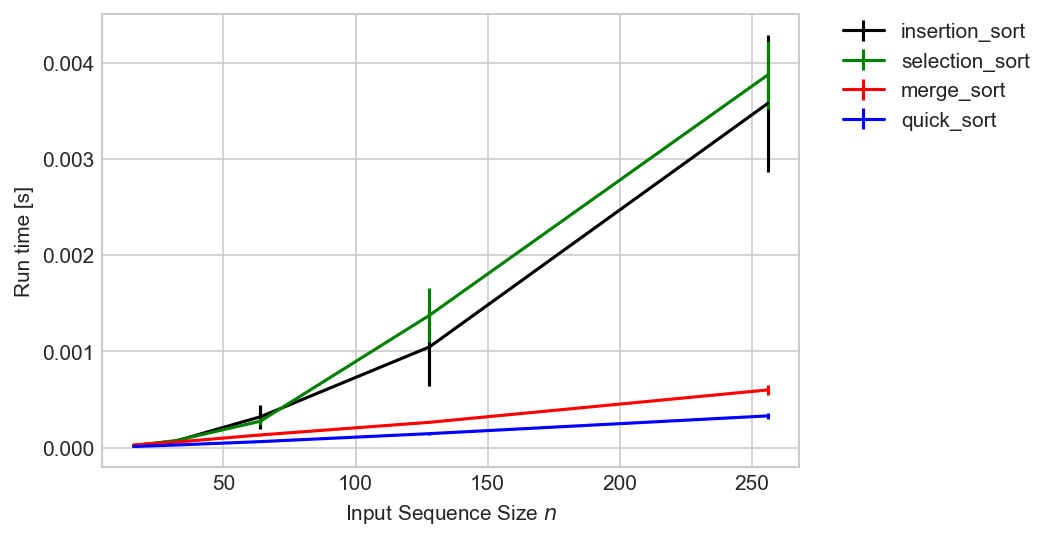

In [9]:
import warnings
warnings.filterwarnings("ignore")

fig = plt.figure(dpi=150)
insertion_sort = plt.errorbar(lengths, run_time_insertion,label='insertion_sort',color='black',yerr=std_run_time_insertion)
selection_sort = plt.errorbar(lengths, run_time_selection,label='selection_sort',color='green',yerr=std_run_time_selection)
merge_sort = plt.errorbar(lengths, run_time_merge,label='merge_sort',color='red',yerr=std_run_time_merge)
quick_sort = plt.errorbar(lengths, run_time_quick,label='quick_sort',color='blue',yerr=std_run_time_quick)
ax = plt.axes()
ax.set_xlabel('Input Sequence Size $n$')
ax.set_ylabel('Run time [s]');
plt.legend(handles=[insertion_sort, selection_sort, merge_sort, quick_sort])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Why did we have obtained the above results? This is because the average-case complexities of insertion_sort and selection_sort are both `O(n^2)`, whereas those of merge_sort and quick_sort are both `O(nlogn)`